<a href="https://colab.research.google.com/github/jestin772/NLP/blob/master/Disaster_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/disaster_tweets.csv")

df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [110]:
df.tail()

,id,keyword,location,text,target
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


In [ ]:
df.shape

(11370, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [ ]:
df.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [ ]:
df['target'].value_counts()

,count
target,
0,9256
1,2114


In [ ]:
df.drop(['id'], axis = 1, inplace = True)
df.drop(['keyword'], axis = 1, inplace = True)
df.drop(['location'], axis = 1, inplace = True)

In [ ]:
df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
stem_port = PorterStemmer()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stemming(content):
  # Convert content to string to handle non-string values
  content = str(content)
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [stem_port.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content


In [ ]:
df['text'] = df['text'].apply(stemming)

In [ ]:
df['text']

,text
0,commun violenc bhainsa telangana stone pelt mu...
1,telangana section impos bhainsa januari clash ...
2,arsonist set car ablaz dealership http co goqv...
3,arsonist set car ablaz dealership http co gl n...
4,lord jesu love bring freedom pardon fill holi ...
...,...
11365,media warn us well advanc wreck whole night re...
11366,feel directli attack consid moonbin amp jinjin...
11367,feel directli attack consid moonbin amp jinjin...
11368,ok rememb outcast nd dora au au wreck nerv nd ...


In [ ]:
x= df['text'].values
y= df['target'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
x = vectorizer.transform(x)

In [ ]:
print(x)

  (0, 46)	0.28541456093557405
  (0, 1673)	0.3092344158414212
  (0, 3326)	0.2580824992669414
  (0, 8221)	0.440385272620047
  (0, 12274)	0.2588544208968677
  (0, 14013)	0.34636678645831737
  (0, 16801)	0.23443291629339744
  (0, 17843)	0.28694397490552215
  (0, 18467)	0.30416222199500126
  (0, 20021)	0.26209812443235414
  (0, 20183)	0.2772824491760127
  (1, 1673)	0.3068398509656009
  (1, 3094)	0.32738058681464016
  (1, 5537)	0.22528627285181546
  (1, 7397)	0.26006856067543416
  (1, 8740)	0.3374861552242923
  (1, 9320)	0.4864196402090135
  (1, 14416)	0.29331001414571206
  (1, 16679)	0.332116743558461
  (1, 18467)	0.30180693378634926
  (1, 19299)	0.2058178900590561
  (2, 46)	0.3731057570430903
  (2, 884)	0.3864192689197646
  (2, 2559)	0.31623065951298557
  (2, 3219)	0.0920726549349098
  :	:
  (11367, 7963)	0.2224796349854119
  (11367, 8305)	0.061957371998960016
  (11367, 8686)	0.22423163089046977
  (11367, 9487)	0.3318047609518882
  (11367, 12047)	0.32147444496558014
  (11367, 14821)	0.3463

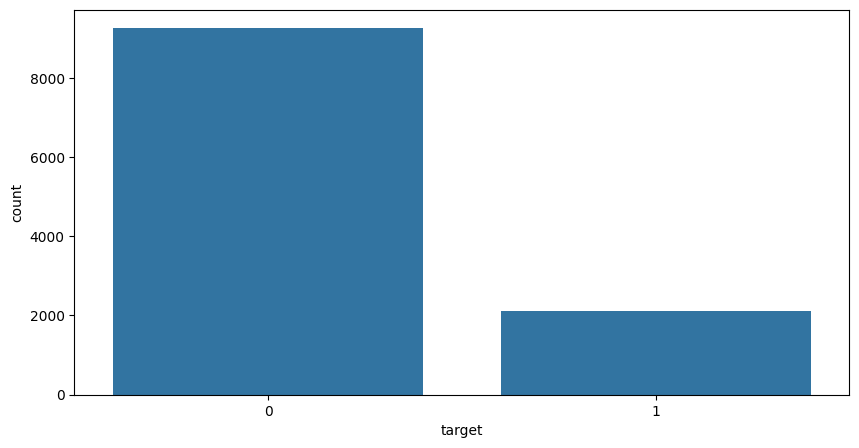

In [ ]:
#bar chart

plt.figure(figsize=(10,5))
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8768689533861038

In [ ]:
df.columns

Index(['text', 'target'], dtype='object')